In [107]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [108]:
df = pd.read_csv("Salary_Data.csv")
len(df)

30

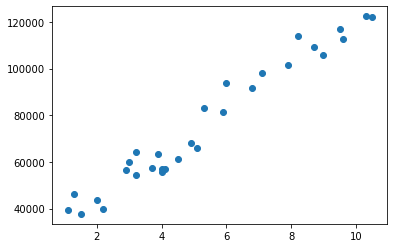

In [109]:
plot = plt.scatter(x = df["YearsExperience"], y = df["Salary"])

In [110]:
#Pytorch


data = df.to_numpy() #
x = data[:,0].reshape(len(df),1)
y = data[:,1].reshape(len(df),1)

scaler_y  = MinMaxScaler(feature_range = (-1,1))
scaler_y.fit(y)
y = scaler_y.transform(y)

scaler_x  = MinMaxScaler(feature_range = (-1,1))
scaler_x.fit(x)
x = scaler_x.transform(x)

inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

model = nn.Linear(1,1)

criterion =  nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
print(x,y)

[[-1.        ]
 [-0.95744681]
 [-0.91489362]
 [-0.80851064]
 [-0.76595745]
 [-0.61702128]
 [-0.59574468]
 [-0.55319149]
 [-0.55319149]
 [-0.44680851]
 [-0.40425532]
 [-0.38297872]
 [-0.38297872]
 [-0.36170213]
 [-0.27659574]
 [-0.19148936]
 [-0.14893617]
 [-0.10638298]
 [ 0.0212766 ]
 [ 0.04255319]
 [ 0.21276596]
 [ 0.27659574]
 [ 0.44680851]
 [ 0.5106383 ]
 [ 0.61702128]
 [ 0.68085106]
 [ 0.78723404]
 [ 0.80851064]
 [ 0.95744681]
 [ 1.        ]] [[-0.96191826]
 [-0.79981101]
 [-1.        ]
 [-0.86312308]
 [-0.94897236]
 [-0.55324829]
 [-0.47037562]
 [-0.60515001]
 [-0.36891094]
 [-0.54032601]
 [-0.39789747]
 [-0.57328136]
 [-0.54580676]
 [-0.54287739]
 [-0.44767305]
 [-0.28639263]
 [-0.33149067]
 [ 0.07150957]
 [ 0.03075833]
 [ 0.32787621]
 [ 0.27585637]
 [ 0.4302386 ]
 [ 0.50179542]
 [ 0.7973305 ]
 [ 0.69383416]
 [ 0.60290574]
 [ 0.87191117]
 [ 0.76952516]
 [ 1.        ]
 [ 0.98773919]]


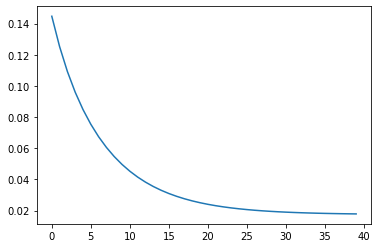

In [111]:
n_epochs = 40
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
plt.plot(losses)



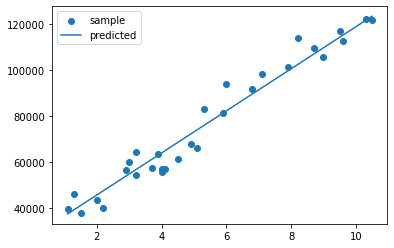

In [116]:
predicted = model(inputs).detach().numpy()
predicted = scaler_y.inverse_transform(predicted)
plt.scatter(x = df["YearsExperience"], y = df["Salary"], label = "sample")
plt.plot(df["YearsExperience"],predicted ,label = "predicted")
plt.legend()
plt.show()